# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has always been a public market that serves as a meeting point for individuals and entities interested in issuing, buying and selling stock that either trade on the stock exchange or over-the-counter.
This serves as opportunity for investors to partake in the profits of publicly-listed companies into which they have bought stocks or made other investments thereby growing wealth, providing tax benefits. Investments are tested ways of achieving financial security which can be attributed to compounding interests on the investments.

Stocks, also known as equities represent ownership in a company albeit fractional. Therefore, losses and gains will be shared with the investors. In order to maximise dividends on investments, investors are advised to maintain a diversified portfolio when investing in stocks. This then means that an optimal mix of securities that diversifies and hedges the investments need to be determined. Seeing that there are several financial metrics and companies to consider, it will be laborious and time-consuming to analyse these metrics manually to determine the high-yielding stocks amongst the swarm of different stocks. By doing a cluster analysis to group stocks with similar characteristics can help investors determine which stocks to invest in across the different market segments and protect their investments from losses.
With these clusters, investors can make informed choices based on some key financial ratios that indicate the profitability, financial stability and growth potential of a publicly-listed company.



### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

**Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

**Read the data**

In [ ]:
# Read the data and create a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 7/Project/stock_data.csv')

**Check the data dimension**

In [ ]:
# Display the dimension of the data
data.shape

(340, 15)

In [ ]:
# Print the number of rows and columns.
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 340 rows and 15 columns.


Observations:

There are 340 observations having 15 varying attributes in the dataset. K-means or hierachical algorithm can be used therefore these 2 algorithms will be used and compared to determine which best groups the data.

**Conduct random inspection of some observations**

In [ ]:
# Check some random observations in the data.
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


Observations:

- All columns except one corresponds data entries except the Security column. This name will be changed to represent an appropriate name relating to the entries.

- There exist some negative entries in some columns: Earnings Per Share, Price Change and P/B Ratio, etc. which appear normal.

**Preserve the original data**

In [ ]:
# Copy the dataset into a new dataframe and check.
df = data.copy()

# Change the name of the Security column
df.rename(columns={'Security':'Company Name'}, inplace = True)
df.sample(n=5, random_state=1)

,Ticker Symbol,Company Name,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102


Observations:

-The Security column has been renamed to Company name. This clearly represents the entries in that particular column.

-Net Income also appears to have negative values. This is also normal.

**Check the data types in the dataset**

In [ ]:
# print the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Company Name                  340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Observations:

- There appears to be no empty entries in the dataset.

- The dataset contains 15 columns: 4 are integer type ('ROE', 'Cash Ratio', 'Net Cash Flow', and 'Net Income'), 7 of float type ('Current Price', 'Price Change', 'Volatility', 'Earnings Per Share', 'Estimated Shares Outstanding', P/E Ratio', and P/B Ratio). While the remaining are object type ('Ticker symbol', 'Company Name', 'GICS Sector'and 'GICS Sub Industry').

- Total memory usage is approximately 40 KB.

**Check for missing values in the dataset**

In [ ]:
# check for missing values
df.isna().sum()

Ticker Symbol                   0
Company Name                    0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

Observations:

- There are no missing entries in the dataset.

**Check for duplicate values in the dataset**

In [ ]:
# check if there are any duplicates across any rows in the entries
df.duplicated().sum()

0

Observations:

- There are no duplicate entries in the dataset.

**Display a statistical summary of the data**

In [ ]:
# Get the summary statistics of the numerical columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company Name,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Observations:

- There is a total of 340 different companies represented in the data and most of these companies belong to the Industrial sector of the economy.

- A total of 11 economic sectors have been represented in the data.

- The prices of most of the stock are lesser than the average price of $80.82.

- The highest price of stocks is $1,275.

- More than 75% of shares return less than $4.6 on investment.

- More than 50% of companies make more than $700 million after tax.

- The average volatility of stock prices in the last 13 weeks is $1.53.

- This means that the average stock price can increase by $1.53.

- On average a share returns $2.78 per share.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

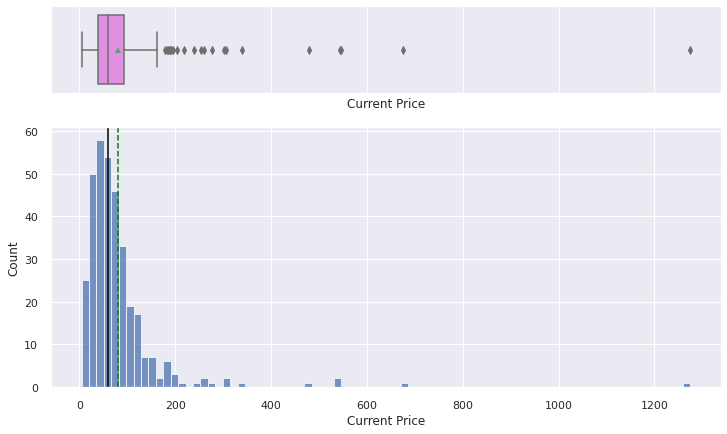

In [ ]:
# create histogram and boxplot for Current Price
histogram_boxplot(df, 'Current Price')

Observations:

- The distribution of current stock prices is rightly skewed.

- There exist outliers in the distribution and more than 50% of the current stock prices is less than $80 per share.

**`Price Change`**

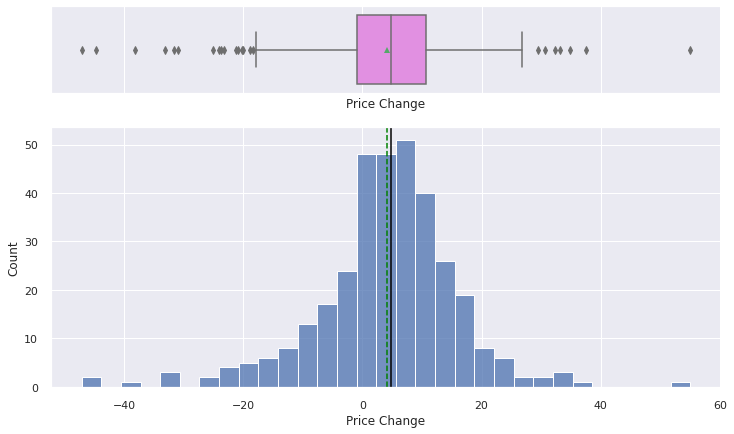

In [ ]:
# create histogram and boxplot for Price Change
histogram_boxplot(df, 'Price Change')

Observations:

- The distribution of share price changes is left-skewed.

- There exist outliers in the distribution and some share prices reduced by more than 20% within 13 weeks.

**`Volatility`**

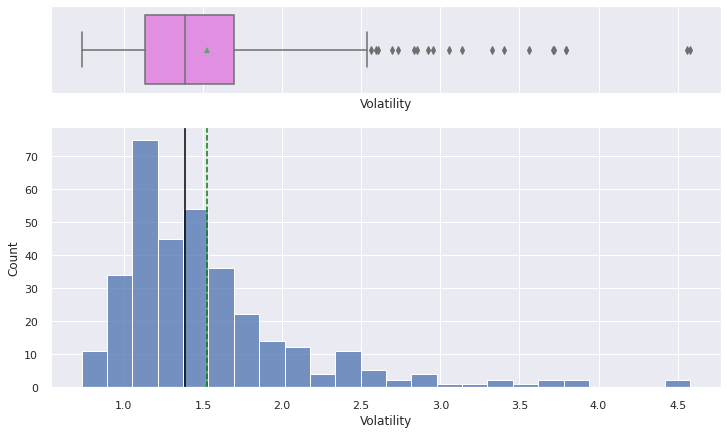

In [ ]:
# create histogram and boxplot for Volatility
histogram_boxplot(df, 'Volatility')

Observations:

- The distribution of share price volatility is right-skewed.

- There exist outliers in the distribution and most share prices are volatile and likely to change.

**`ROE`**

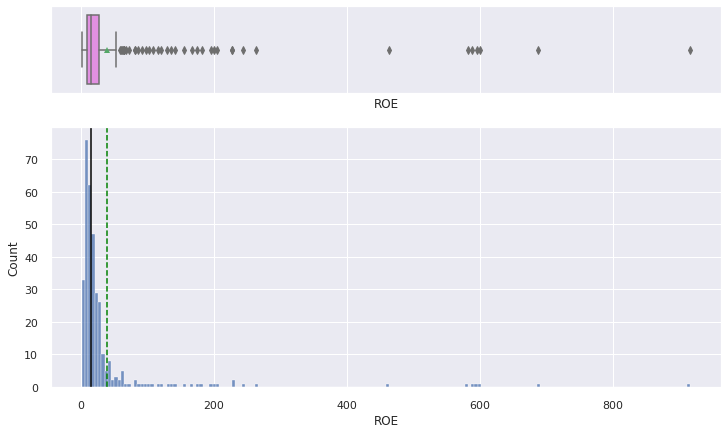

In [ ]:
# create histogram and boxplot for ROE
histogram_boxplot(df, 'ROE')

Observations:

- The distribution of ROE is heavily right-skewed.

- Only a few company securities in the top 25% are able to generate very high profits.

**`Cash Ratio`**

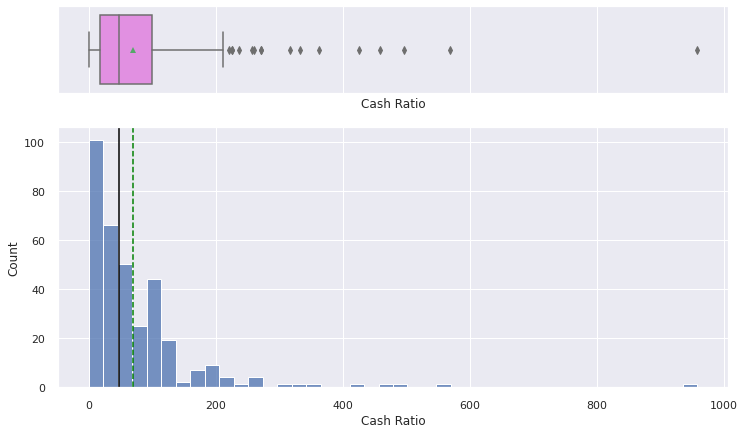

In [ ]:
# create histogram and boxplot for Cash Ratio
histogram_boxplot(df, 'Cash Ratio')

Observations:

- The distribution of Cash Ratio is rightly skewed.

- Only a few top companies can easily meet their cash obligations.

- At least 75% of the companies have cash ratio of 99.

**`Net Cash Flow`**

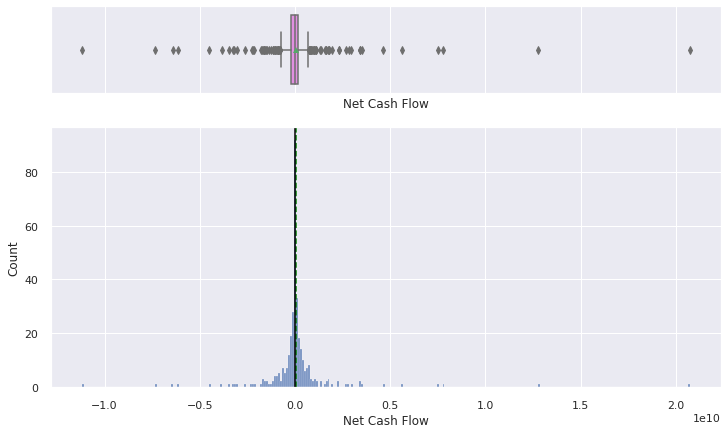

In [ ]:
# create histogram and boxplot for Net Cash Flow
histogram_boxplot(df, 'Net Cash Flow')

Observations:

- The distribution of Net Cash Flow is uniformly distributed.

- The bottom 25% of companies are running at loss. The average cash flow is about $56M.

- The maximum cash flow is over $20B.

**`Net Income`**

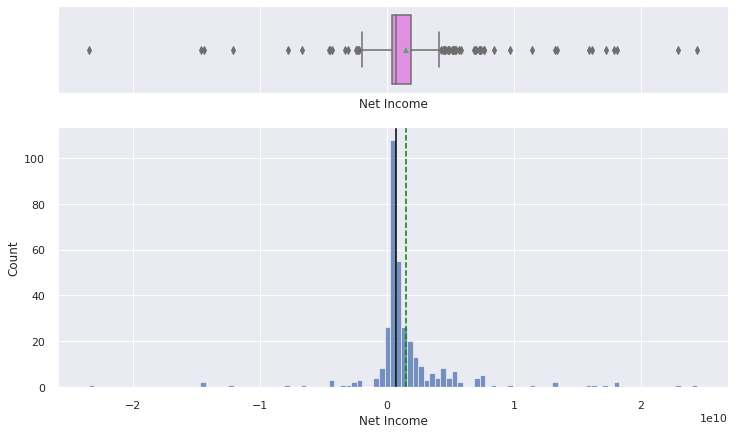

In [ ]:
# create histogram and boxplot for Net Income
histogram_boxplot(df, 'Net Income')

Observations:

- The distribution of Net Income is right-skewed.

- There exist outliers in the distribution and more than 50% of the current stock prices is less than $80 per share.

**`Earnings Per Share`**

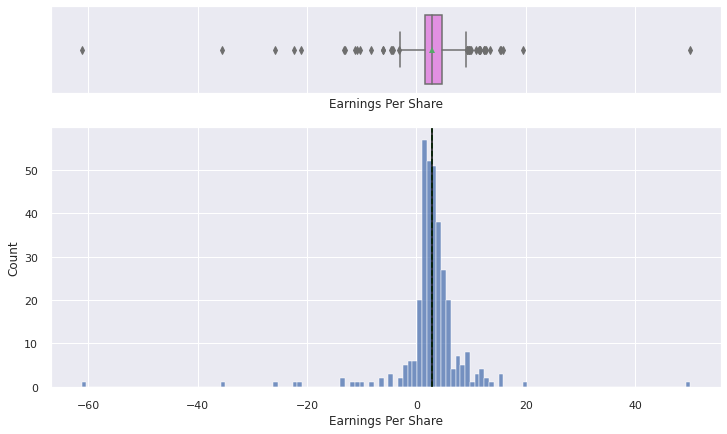

In [ ]:
# create histogram and boxplot for Earning Per Share
histogram_boxplot(df, 'Earnings Per Share')

Observations:

- The distribution of Earnings Per Share is uniformly distributed.

- There exist outliers and 50% of shares gained at least $2.895/share.

- The largest share gained is recorded at $50.09.

**`Estimated Shares Outstanding`**

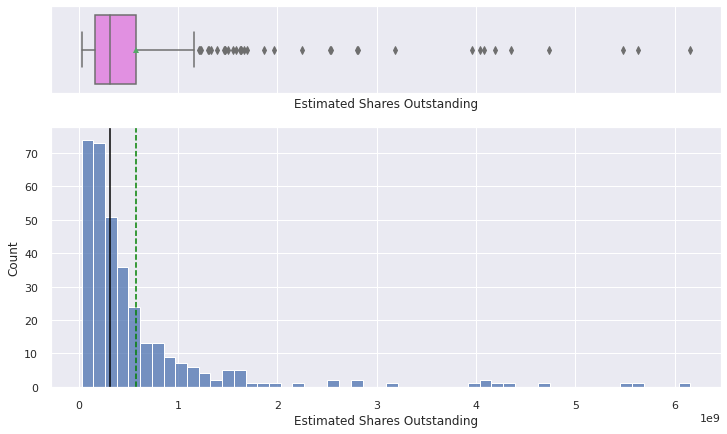

In [ ]:
# create histogram and boxplot for Estimated Shares Outstanding
histogram_boxplot(df, 'Estimated Shares Outstanding')

Observations:

- The distribution of Estimated Shares Outstanding is right-skewed.

- Approximately 310M shares are currently held by sharehholders of at least 50% of the companies.

- Approximately 573M shares are currently held by shareholders of the top 25% of companies.

**`P/E Ratio`**

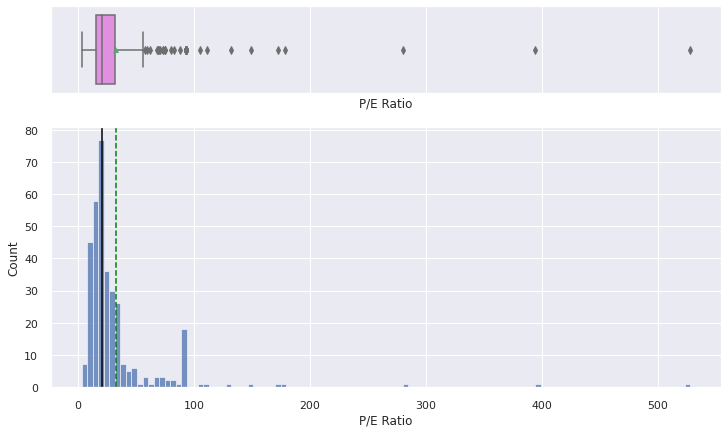

In [ ]:
# create histogram and boxplot for P/E Ratio
histogram_boxplot(df, 'P/E Ratio')

Observations:

- The distribution of P/E Ratio is right-skewed.

- From the P/E ratio of the top 25% of company's securities, investors are willing to pay USD31.76 per USD1 of the top 25% companies.

**`P/B Ratio`**

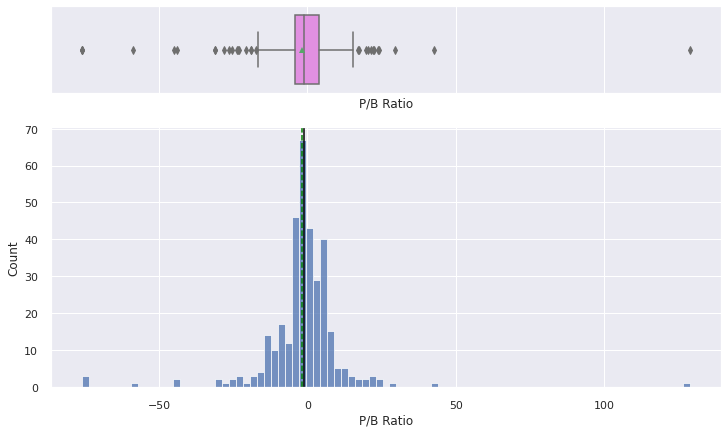

In [ ]:
# create histogram and boxplot for P/B Ratio
histogram_boxplot(df, 'P/B Ratio')

Observations:

- The distribution of P/B ratio is uniformly distributed.

- It appears that the stocks of 50% of the companies may be undervalued seeing that they have P/B ratio less than 1 or they may have high liabilities.

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

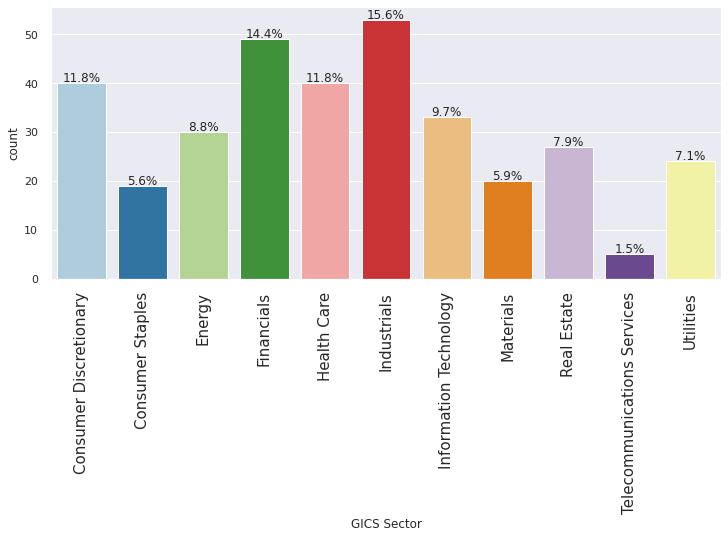

In [ ]:
# Visualise the distribution of the economic sectors
labeled_barplot(df, 'GICS Sector', perc=True)

Observations:

- Companies belonging to the industrial sector are the most listed followed by companies in the financial sector and consumer discretionary in order.

- The lowest listed companies are those in the telecommunications sector at 1.5%.

**`GICS Sub Industry`**

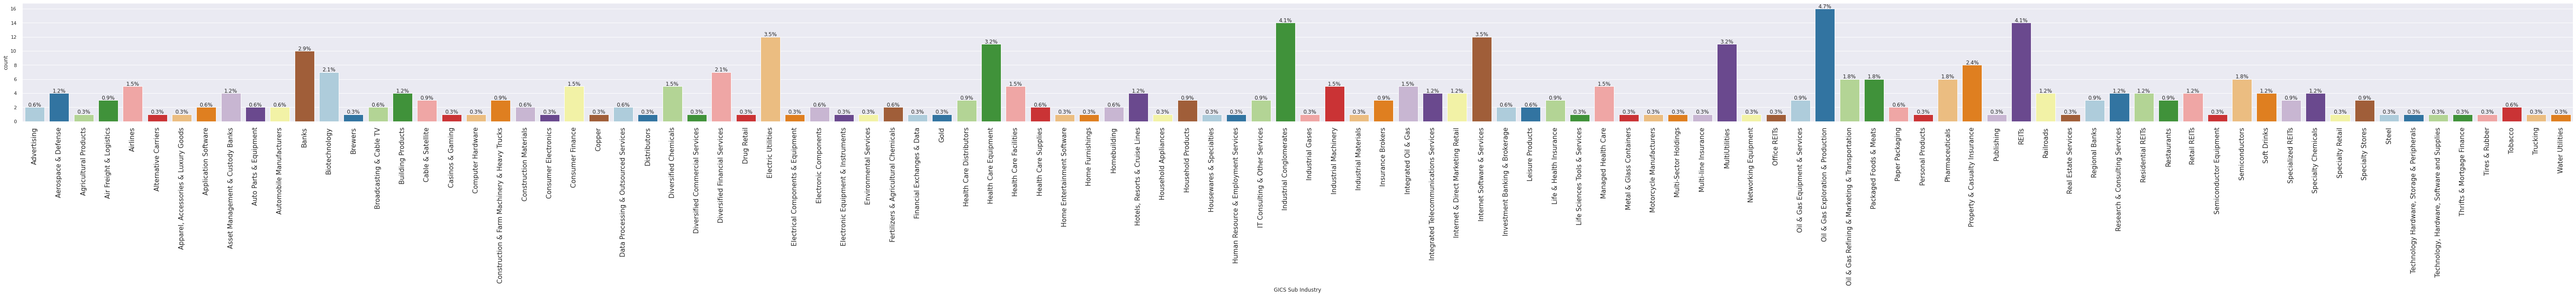

In [ ]:
# Visualise the distribution of sub industries across the economic sectors
labeled_barplot(df, 'GICS Sub Industry', perc=True)

Observations:

- The top 10 companies according to the GICS Sub Industry are visualised below.

**`Frequency of GICS Sub Industry`**

In [ ]:
# Determine the frequencies of the sub industries
df['GICS Sub Industry'].value_counts()

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery        

**`Top 10 GICS Sub Industry`**

In [ ]:
# Create a dataframe of the top 10 sub industry distributions across economic sectors
df_GICS_Sub_large_freq = pd.DataFrame(df['GICS Sub Industry'].value_counts().nlargest(10))
df_GICS_Sub_large_freq

,GICS Sub Industry
Oil & Gas Exploration & Production,16
REITs,14
Industrial Conglomerates,14
Electric Utilities,12
Internet Software & Services,12
Health Care Equipment,11
MultiUtilities,11
Banks,10
Property & Casualty Insurance,8
Diversified Financial Services,7


Observations:

- The top 5 GICS Sub Industry are Oil & Gas Exploration, REITs, Industrial Conglomerates, Electrical Utilites and Internet Software & Services.

**`Chart of top 10 GICS Sub Industry`**

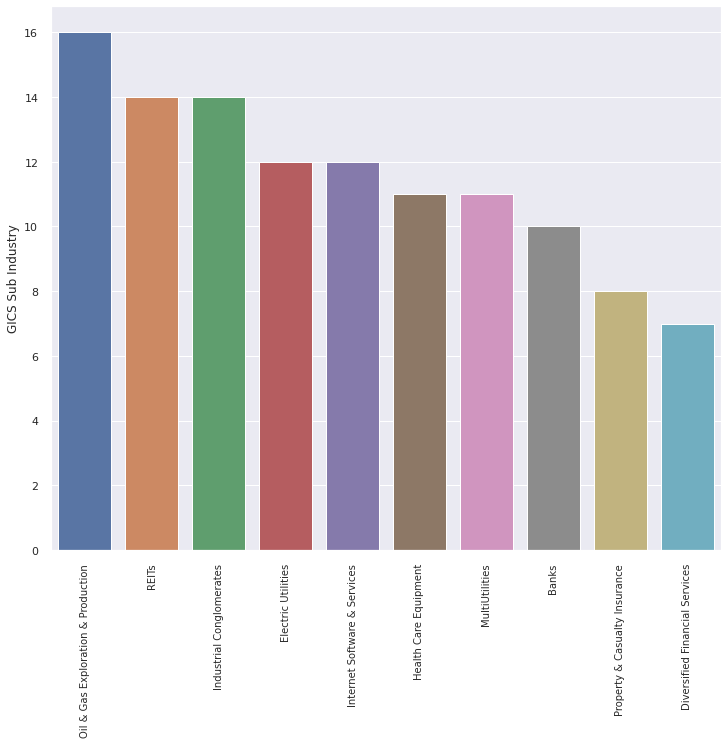

In [ ]:
# Plot the top 10 sub industry distribution
plt.figure(figsize = (12,10))
plt.xticks(rotation=90, fontsize=10)
sns.barplot(x = df['GICS Sub Industry'].value_counts().nlargest(10).index, y = df['GICS Sub Industry'].value_counts().nlargest(10))
warnings.filterwarnings("ignore")
plt.show()

Observations:

- Oil & Gas Exploration and Production have up to 16 companies listed, Industrial Conglomerates have 14 companies listed. Oil & Gas Exploration and Production industry has the highest listings.

- There are up to 10 banks listed and 12 Internet Software & Services firms listed.

**`Correlation of numerical variables`**

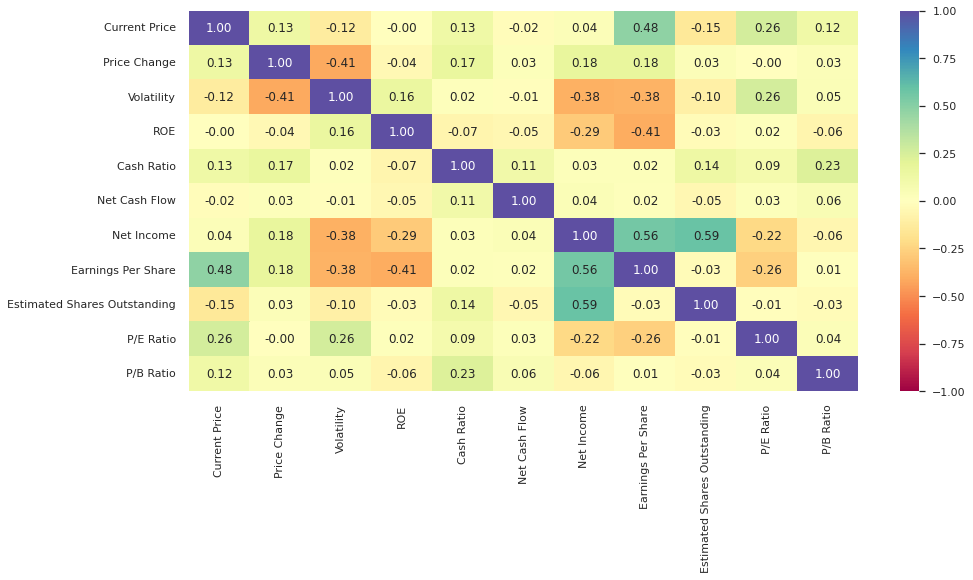

In [ ]:
# Visualise the correlation among the numerical variables in the dataset
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

- Net Income has a positive correlation with Earnings Per Share and Estimated Shares Outstanding.

- Earnings Per Share is also positively correlated with Current Price.

- Earnings Per Share is negatively correlated with Volatility and ROE.

**`Price Ratio VS GICS Sector`**

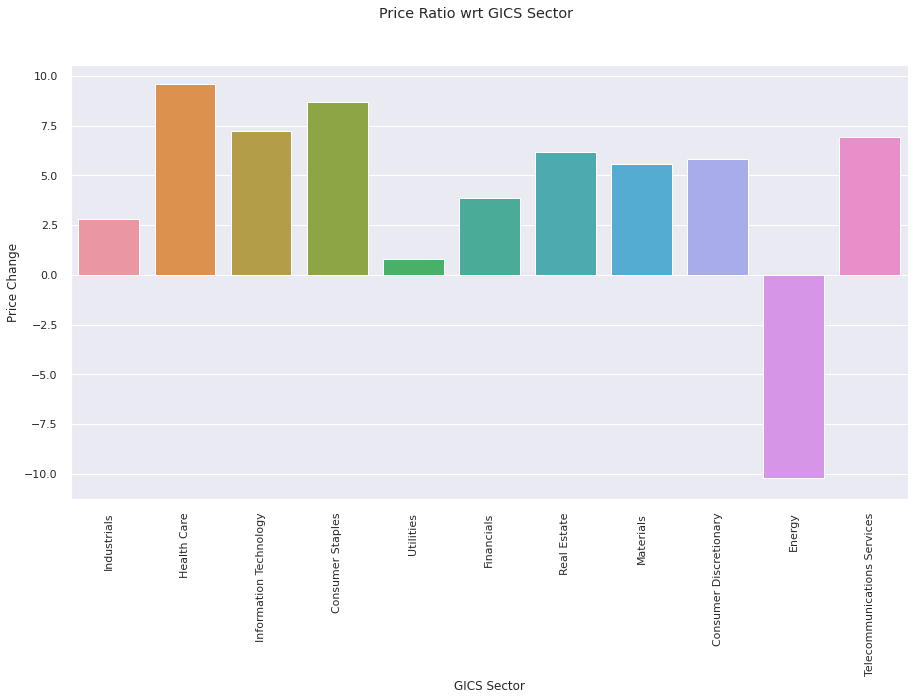

In [ ]:
# Visualise price changes across economic sectors
plt.figure(figsize=(15,8))
plt.suptitle("Price Ratio wrt GICS Sector")
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

Observations:

- The stock prices of securities in the energy sector change negatively.

- The stock prices in the health sector have seen the highest percentage increases followed by Consumer Staples.

**`Cash Ratio VS GICS Sector`**

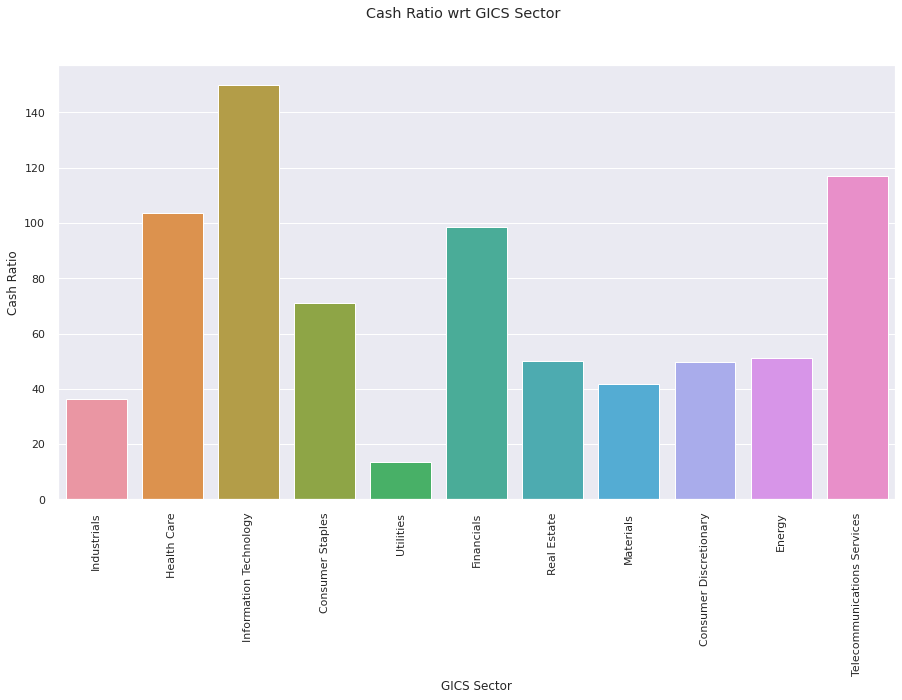

In [ ]:
# Visualise cash ratios across economic sectors
plt.figure(figsize=(15,8))
plt.suptitle("Cash Ratio wrt GICS Sector")
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Observations:

- The Information Technology and Telecommunications setors have the highest Cash Ratio while Utilities have the lowest Cash Ratio.

- The Information Technology companies can easily meet short term cash obligations than any other sector.

- Companies in the utilites sector may struggle to meet cash obligations.

**`P/E Ratio VS GICS Sector`**

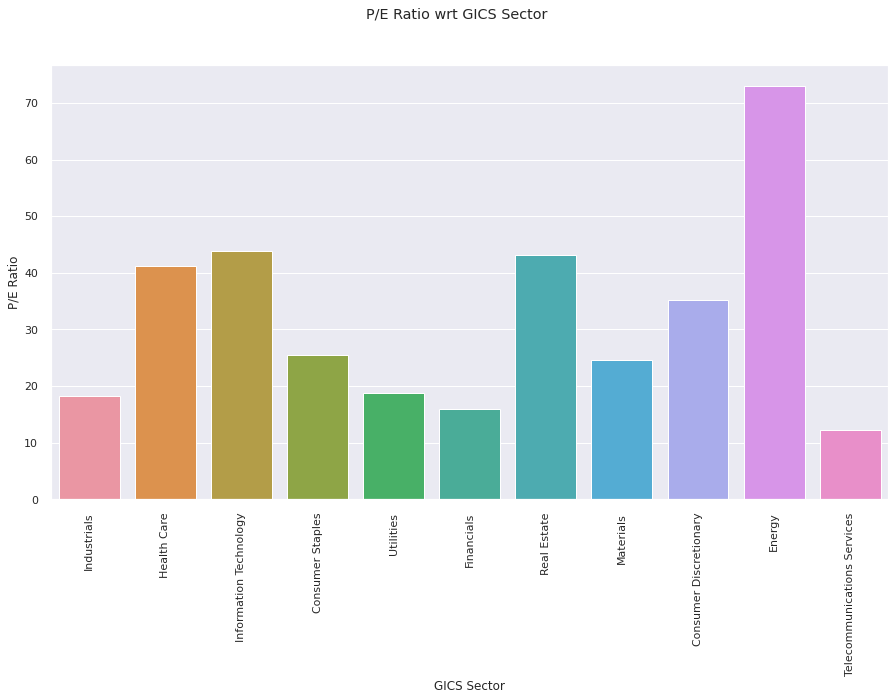

In [ ]:
# Visualise P/E ratios across economic sectors.
plt.figure(figsize=(15,8))
plt.suptitle("P/E Ratio wrt GICS Sector")
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Observations:

- The energy sector has the highest P/E Ratio.

- Securities in the energy sector require higher investments per dollar gain.

- Investors are willing to pay, on average, over $70 per dollar gain for telecommunications services stocks.

**`Volatility VS GICS Sector`**

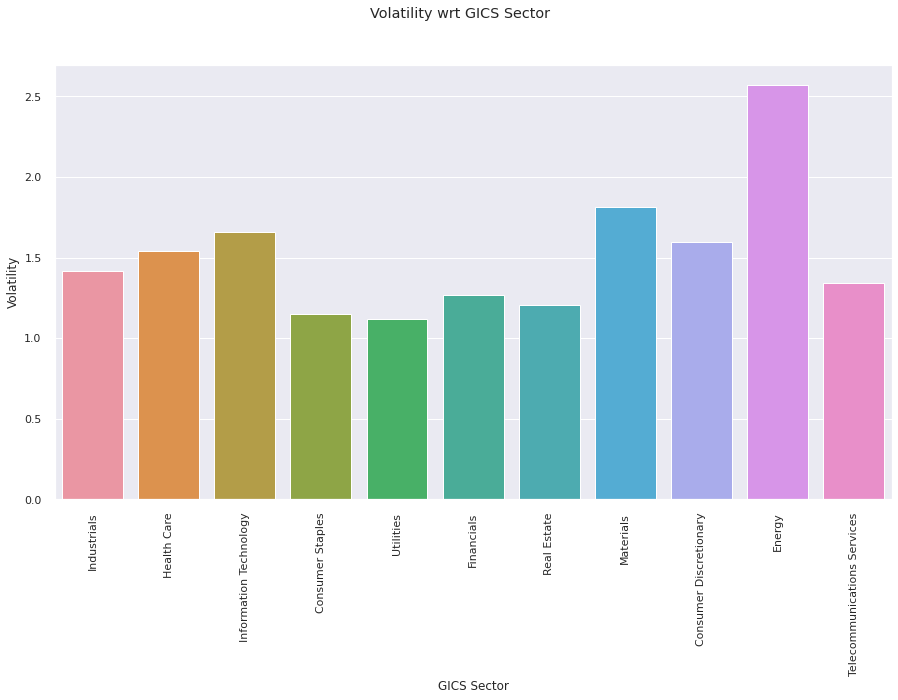

In [ ]:
# Visualise volatility across economic sectors.
plt.figure(figsize=(15,8))
plt.suptitle("Volatility wrt GICS Sector")
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

Observations:

- The stock prices of energy stocks are the most volatile. Their prices may flunctuate easily.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Display the boxplots to visualise the outliers**

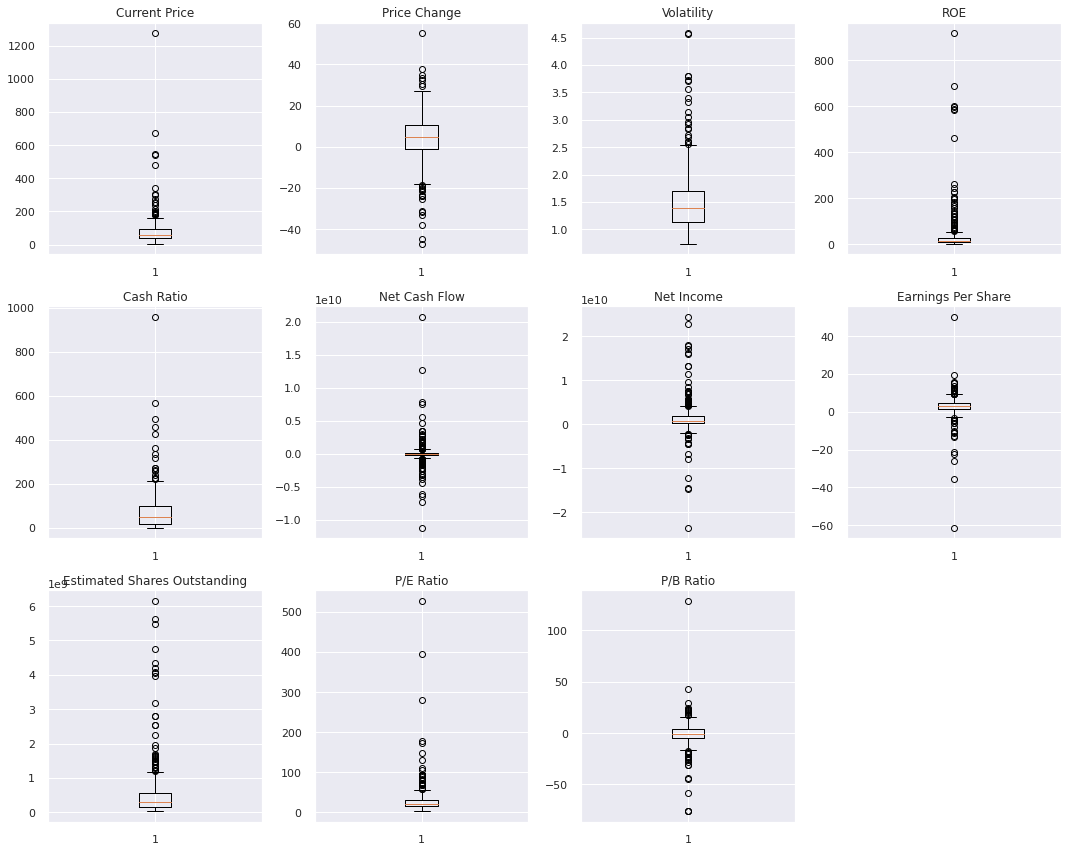

In [ ]:
# create a list of numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

# write a loop to create boxplots for the numerical columns
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

- There exist some outliers in the dataset however these outliers will not be treated.

- These values represent the true values of the different attributes. These are random values which may be influenced by different market, social and economic conditions or even acts of God. Therefore, these entries may not be artificially influenced and represent the true values.

**Dataset Scaling**

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

Observations:

- The dataset has been scaled to prevent skewness to any particular feature.

**Make a dataframe for the scaled data**

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

**Inspect the top 5 rows of the scaled dataset**

In [ ]:
# Check the top 5 rows of the scaled data.
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


Observations:

- The dataset has now been scaled. The values appear balanced.

**Define a function to plot all the boxplots for the scaled data**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Plot all the boxplots**

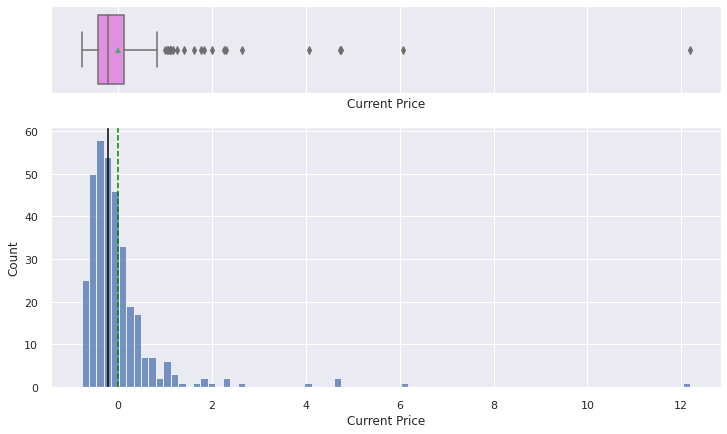

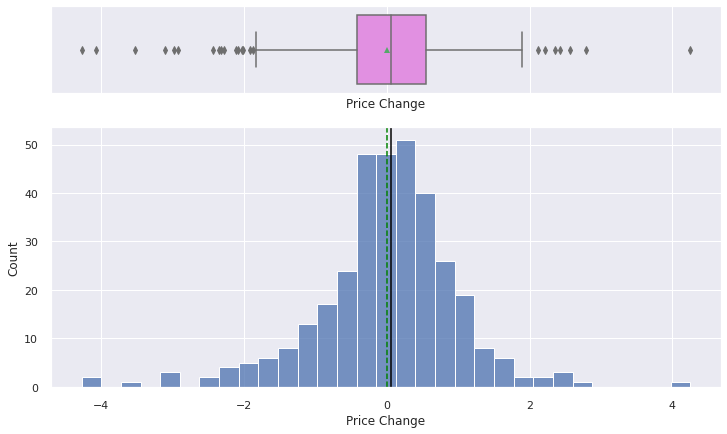

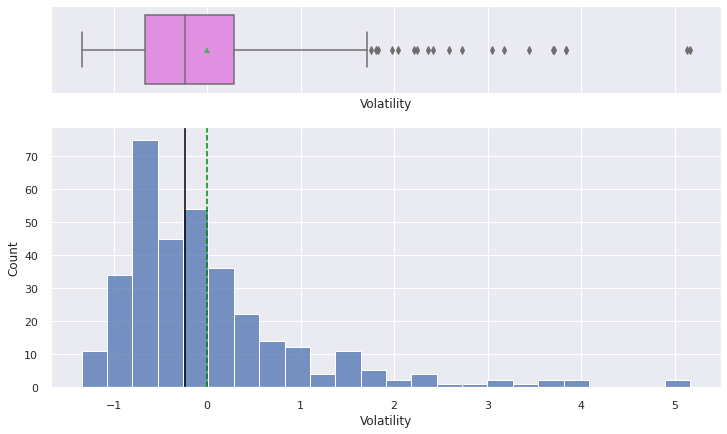

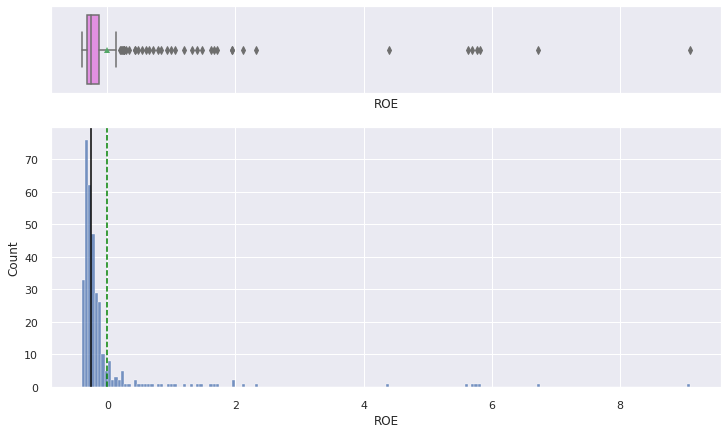

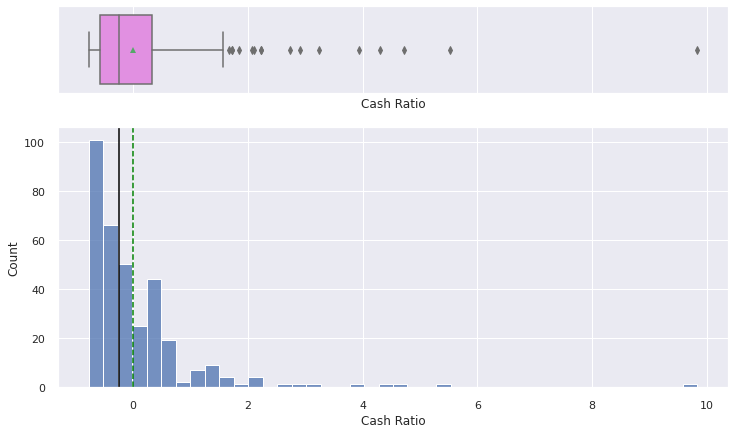

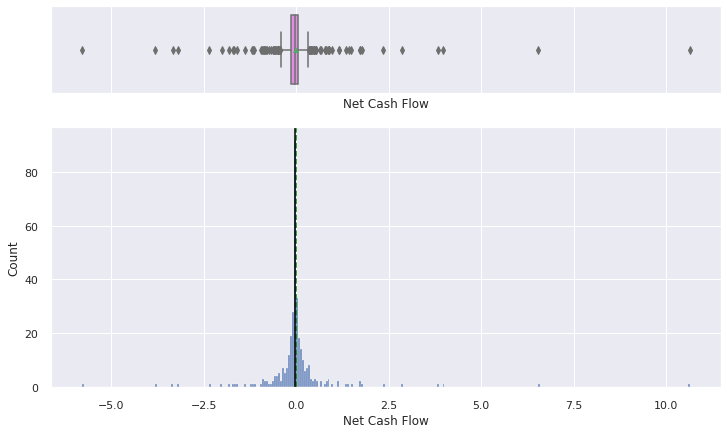

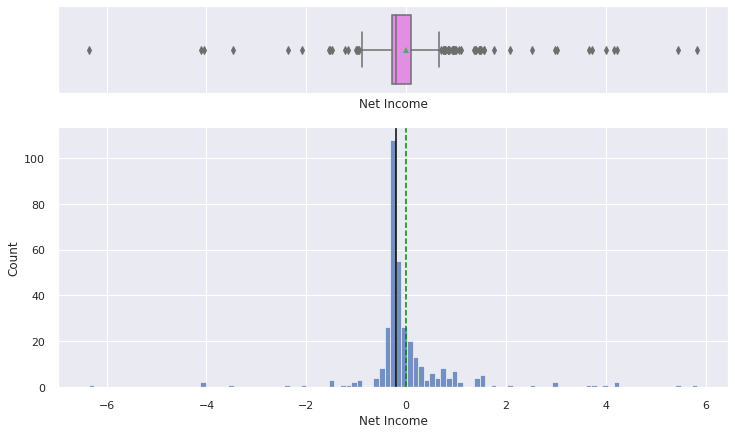

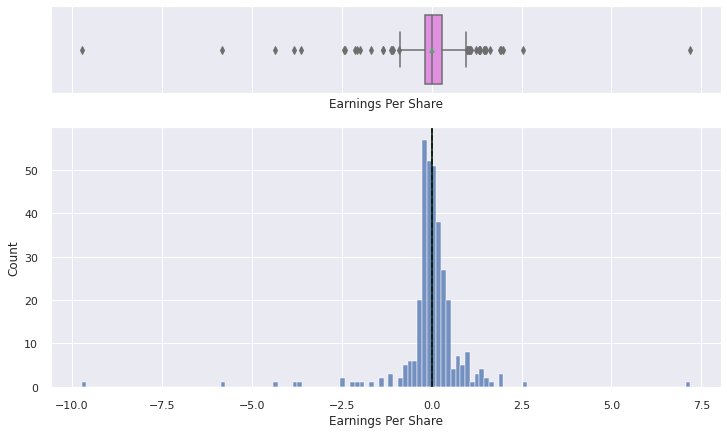

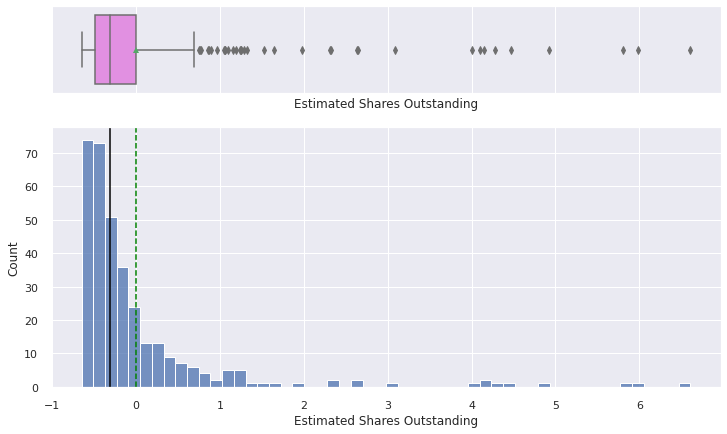

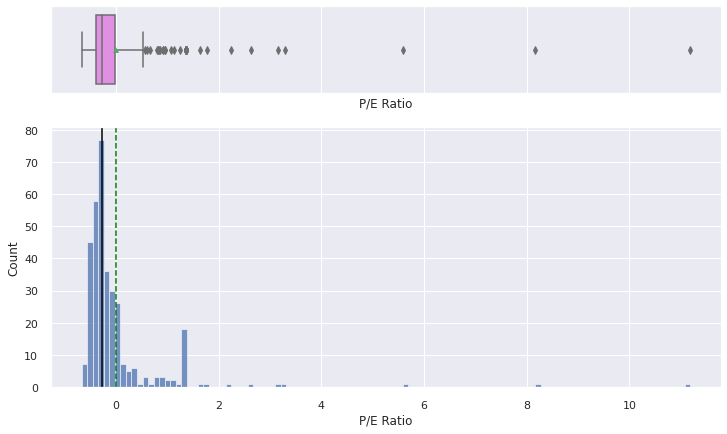

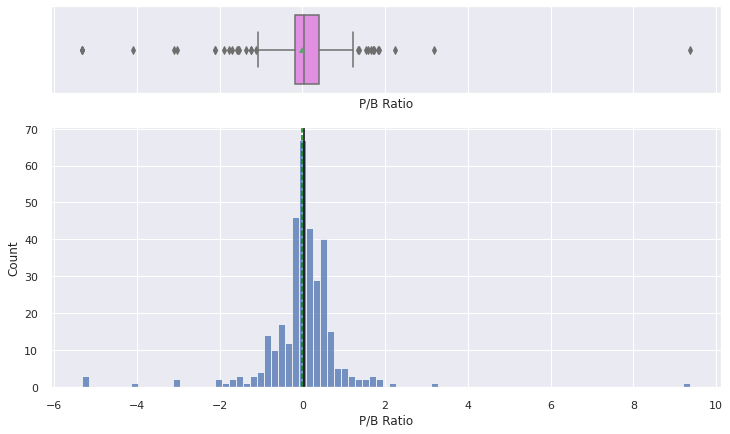

In [ ]:
# Plot all the histograms and boxplots.
for feature in subset_scaled_df.columns:
    histogram_boxplot(subset_scaled_df, feature, figsize=(12, 7), kde=False, bins=None)

Observations:

- The mean of all the attributes now coincides with zero.

## K-means Clustering

**Check the Elbow Plot**

In [ ]:
# Save a copy of the scaled data
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


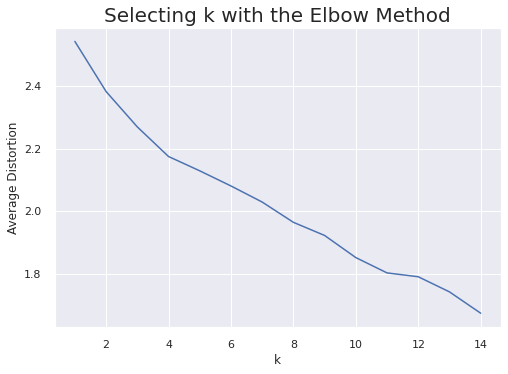

In [ ]:
# Assign clusters and calculate the average distortion
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

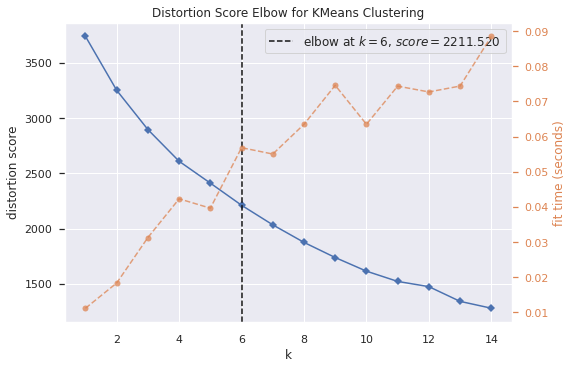

In [ ]:
# Visualise the elbow curve and time to form the respective clusters.
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Observations:

- The appropriate value of k seems to be from 4 to 6 with a distortion score of 2600 ~ 2211.5.

- 6 clusters were achieved in about 0.057 seconds.

- Confirmation will be done using the silhouette score.



**Check the Silhouette Scores**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


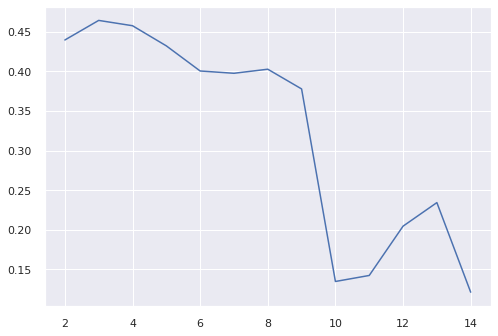

In [ ]:
# Calculate the respective silhouette scores and plot the silhouette.
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

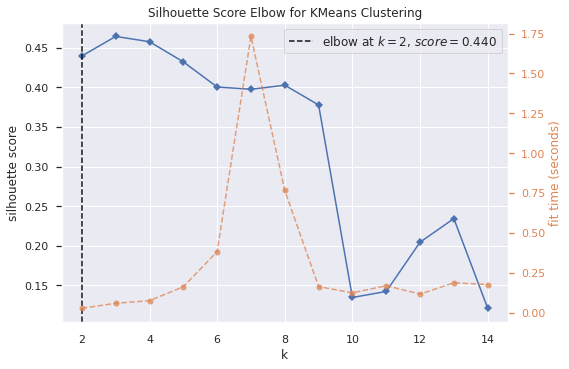

In [ ]:
# Visualise the silhouette and time to calculate the respective silhouette scores.
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

Observations:

- The highest average silhouette score is recorded at k = 3.

- This might mean lumping so many companies into a particular cluster.

- This will be checked using the silhouette coefficient plot.

**Display the silhouette plots**

**`4 clusters`**

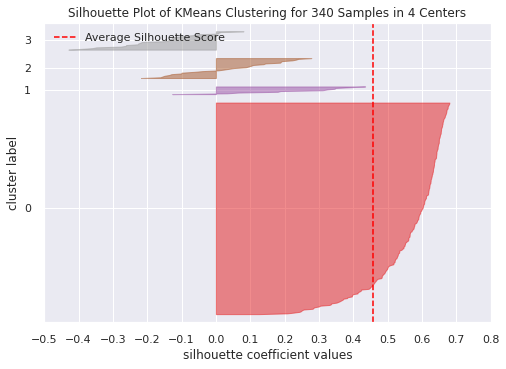

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**`5 clusters`**

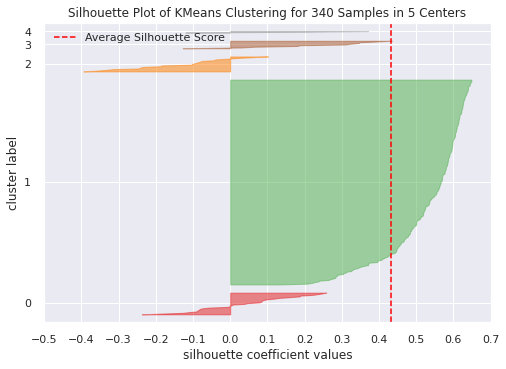

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**`6 clusters`**

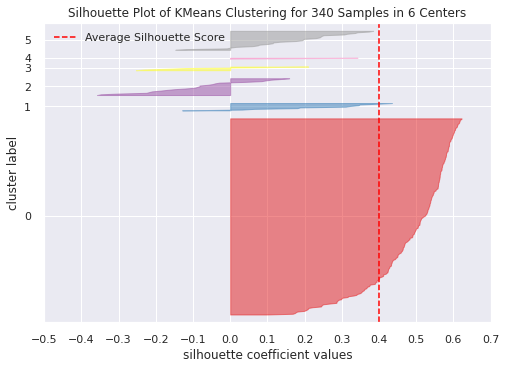

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**`7 clusters`**

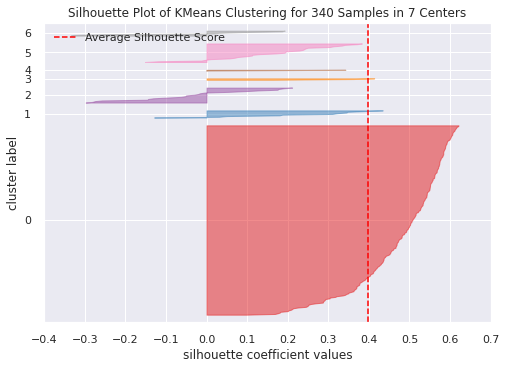

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**`8 clusters`**

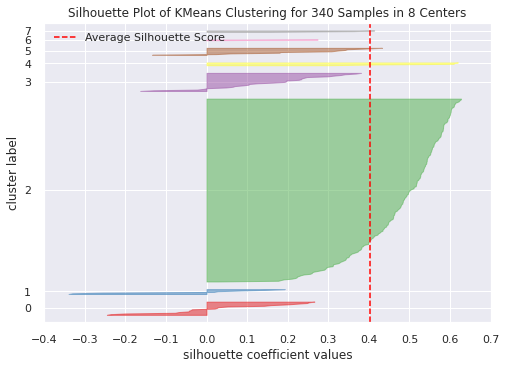

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**`9 clusters`**

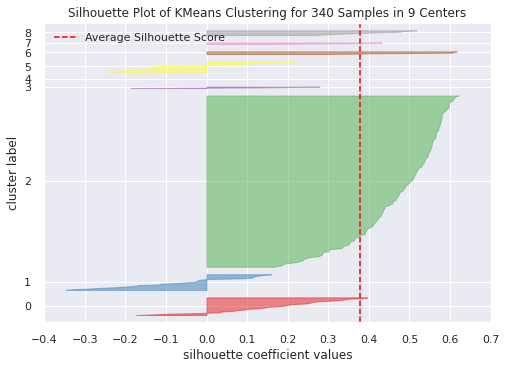

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**`10 clusters`**

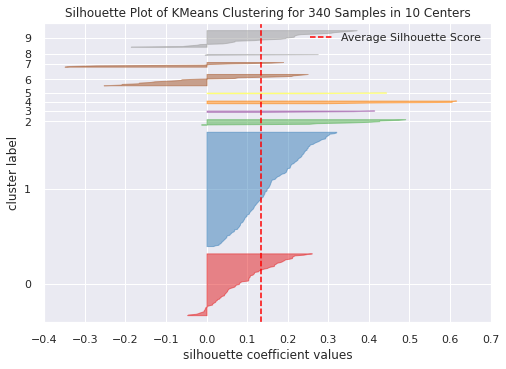

In [ ]:
# find the optimal number of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observations:

- Having 10 clusters, the silhouette coefficient of cluster appears to exceed the average silhouette coefficient value.

- There is high variability in the 10 clusters.

- Investors can distribute their investment portfolio across the different companies in the 10 clusters but this might be cumbersome to manage.

- Therefore, the dataset will divided into 4 clusters following the elbow curve and close to the highest silhouette score value.

**Distribute dataset into 4 clusters**

In [ ]:
# Fit the model on the scaled data
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling (K-means)

In [ ]:
# Determine the mean of each attribute according to the different K-mean clusters
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
# count the number of companies in each k-mean cluster and add the column to the dataframe.
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Company Name"].count().values
)

In [ ]:
# Highlight the maximum mean values of each attribute wrt k-mean clusters.
km_cluster_profile.style.highlight_max(color="green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


**List of clusters and constituents companies**

In [ ]:
# List out all the companies in each cluster.

for cl in df1["KM_segments"].unique():
    print("In cluster {}, there are a total of".format(cl), df1[df1["KM_segments"] == cl]["Company Name"].nunique(), "companies and the companies are as follows:")
    print(df1[df1["KM_segments"] == cl]["Company Name"].unique())
    print()

    print("-" * 100, "\n")

In cluster 0, there are a total of 277 companies and the companies are as follows:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Li

In [ ]:
# Count the number of companies in the k-means clusters according to the respective economic sectors.
df1.groupby(["KM_segments", "GICS Sector"])['Company Name'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

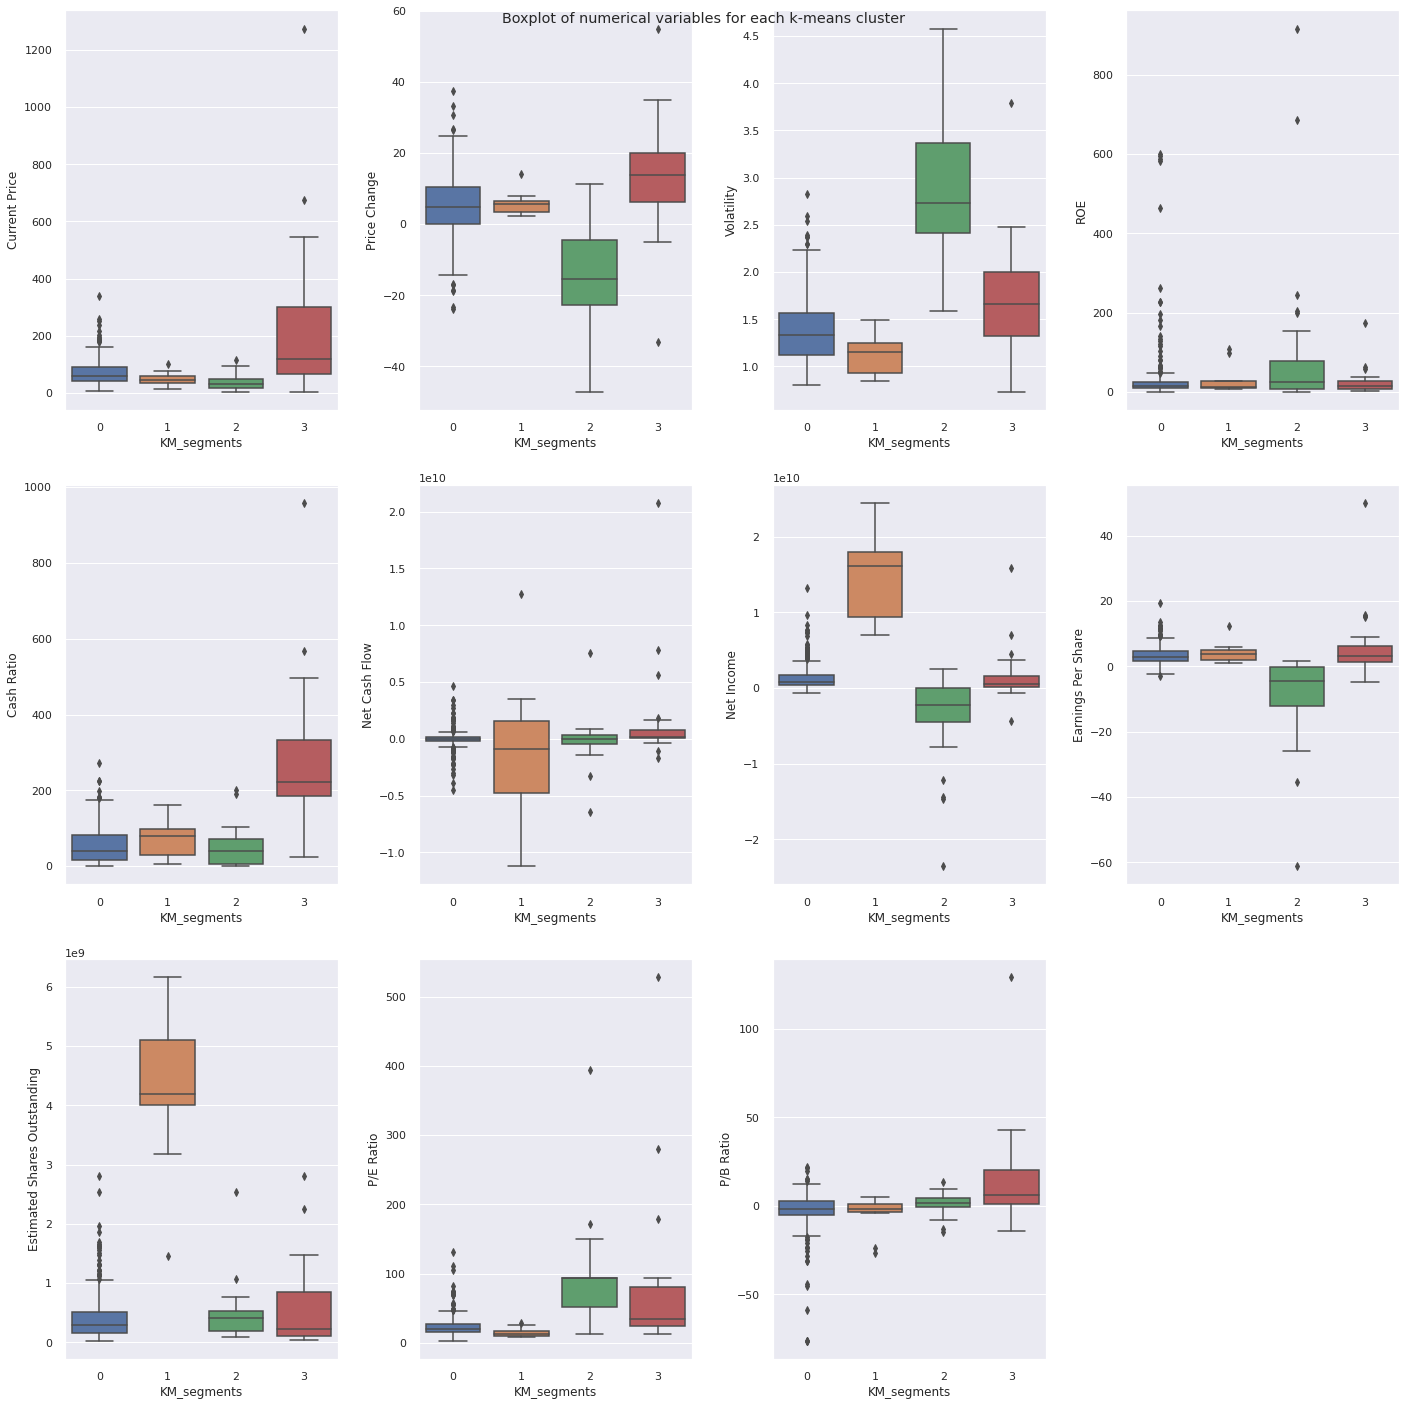

In [ ]:
# Visualise the behaviour of each attribute according to the respective k-mean clusters.
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each k-means cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

**Insights from the K-means Clustering**

The dataset has been grouped into 4 clusters:

- **Cluster 3 - High-yield Stocks**
   - This cluster consists of 25 companies.
   - These companies can easily meet their short-term cash obligations.
   - They also have high earnings per share just as other stocks however these companies have the best financial health.
   - The stock prices are moderately volatile compared to low-yield and average-yield stocks.
   - These stocks have the highest chances of stock price increases.


- **Cluster 1 - Average-yield Stocks**
   - There are 11 companies in this cluster.
   - These companies can meet their short-term cash obligations.
   - They have the highest net income.
   - They also have the least volatile stock prices.
   - These companies have the highest shareholdings.
   
   
- **Cluster 0 - low-yield Stocks**
   - These cluster has up 277 companies.
   - Some its stock prices cost more than $300.
   - Over 50% of the companies are undervalued.
   - They have a net cash flow of zero apart from some outliers.


- **Cluster 2 - Poor-yield Stocks**
   - There are a total of 27 companies in the cluster.
   - They have the lowest net income and earnings per share.
   - Their stock prices are extremely unstable.
   - More than 50% of companies in this cluster experience dip in stock prices.
   - Although these stocks are volatile, they have the highest price-to-earning ratio.

   
   



##Hierachical Clustering

**Store the scaled data for hierachical clustering**

In [ ]:
# Copy the scaled data for hierachical clustering.
hc_df = subset_scaled_df.copy()

**Check the Cophenetic Correlation for the distance metrics**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Compare the euclidean distance across the linkage methods**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


Observation:

- The highest cophenetic correlation is the euclidean distance - average linkage at 0.9423.

**Draw a dendrogram for the linkage methods**

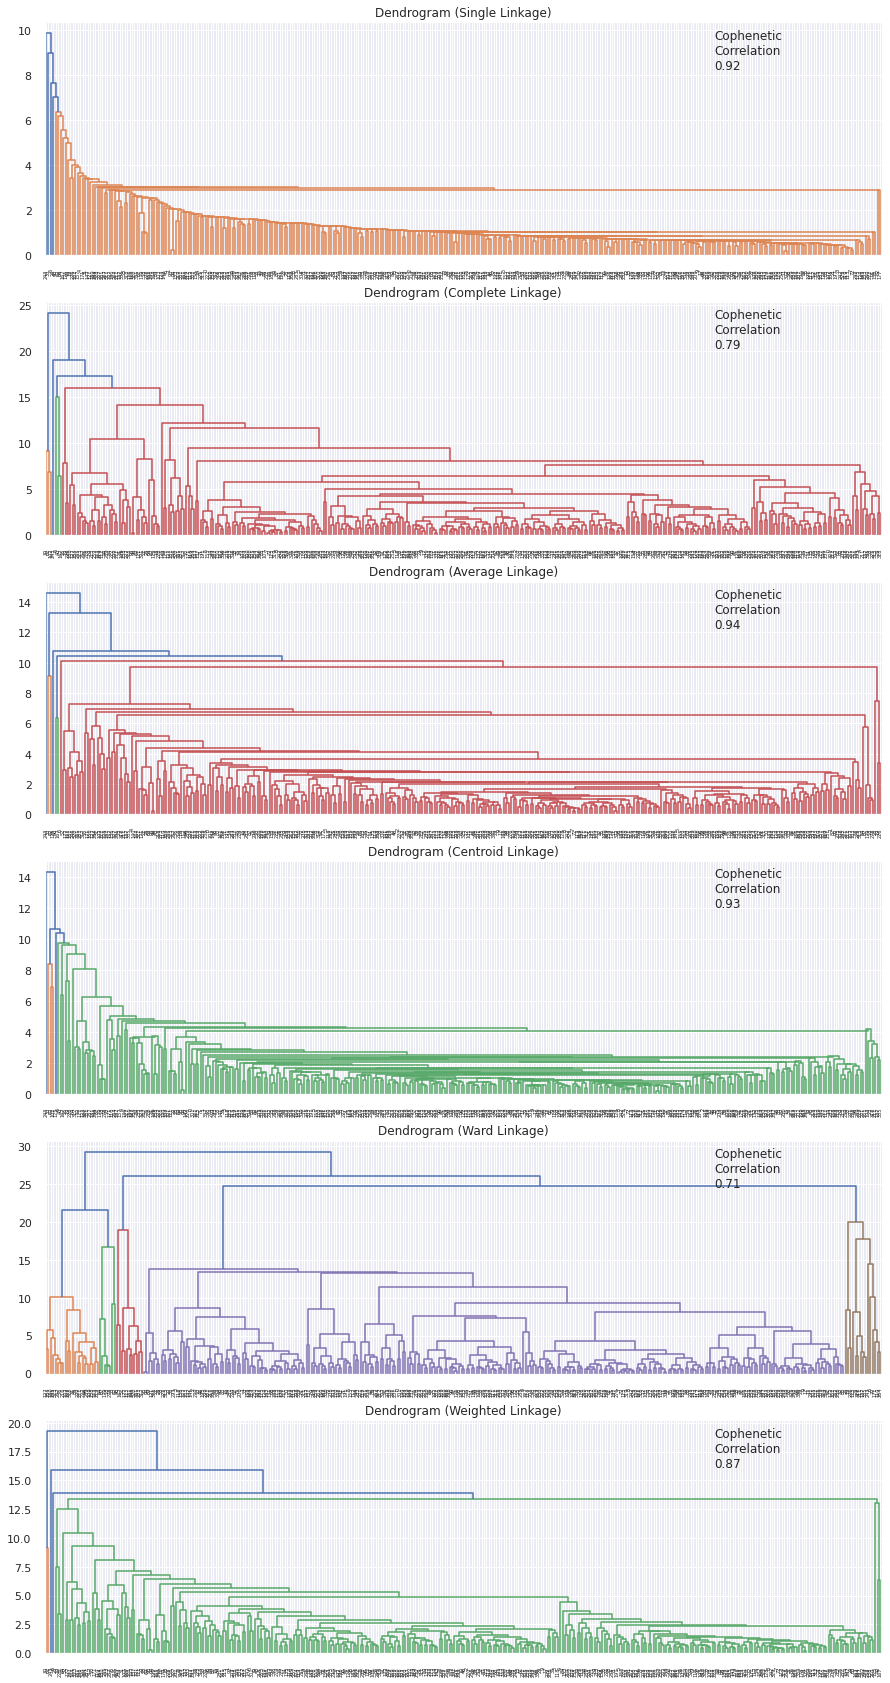

In [ ]:

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Observation:

- The cophenetic coefficient for the different linkage methods have been determined. The values have been tabulated below:


**Tabulate the cophenetic coefficient across the linkage methods**

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods.
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**Create the model for hierachical clustering**

In [ ]:
# Group the data into hierachical clusters.
HCmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=7)

**Cluster Profiling (Hierachical)**

Add the labels column on the final model

In [ ]:
# creating a copy of the original data.
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

Calculate the mean on the features.

In [ ]:
# Determine the mean of each attribute according to the different hierachical clusters
hc_cluster_profile = df2.groupby("HC_segments").mean()

Add a column for the count of entries.

In [ ]:
# count the number of companies in each hierachical cluster and add the column to the dataframe.
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Company Name"].count().values
)

Distribute the dataset into 7 clusters.

In [ ]:
# Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Company Name"].unique())
    print()

In cluster 6, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

Observations:
- clusters 5, 3 and 4 do not have any variability. The ward linkage will checked.

**Create the final model**

The Ward linkage appears to be clearly defined even though it has a low cophenetic correlation. Hence, the ward linkage will be adopted.

In [ ]:
# Group the data into hierachical clusters.
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=6)

Add the labels column on the final model

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

Calculate the mean on the features.

In [ ]:
# Determine the mean of each attribute according to the different hierachical clusters
hc_cluster_profile = df2.groupby("HC_segments").mean()


Add a column for the count of entries.

In [ ]:
# count the number of companies in each hierachical cluster and add the column to the dataframe.
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Company Name"].count().values
)

Distribute the dataset into 6 clusters.

In [ ]:
# Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, there are a total of".format(cl), df2[df2["HC_segments"] == cl]["Company Name"].nunique(), "companies and the companies are as follows:")
    print(df2[df2["HC_segments"] == cl]["Company Name"].unique())
    print()

    print("-" * 100, "\n")

In cluster 1, there are a total of 280 companies and the companies are as follows:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE 

Observations:
- The variability has now been removed upon clustering into 6 clusters.

Highlight the maximum feature means.

In [ ]:
# Highlight the maximum mean values of each attribute in each hierachical clusters.
hc_cluster_profile.style.highlight_max(color="green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,152.566666,14.908086,1.769506,24.434783,281.913043,1747221304.347826,1866621956.521739,3.802174,759756952.867391,38.674023,16.027369,23
1,73.062443,4.673490,1.399188,34.878571,54.507143,66523982.142857,1556658764.285714,3.689625,443300430.283964,24.379506,-3.214885,280
2,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
3,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


Number of companies per economic sector in each cluster.

In [ ]:
# Count the number of companies in the hierachical clusters according to the respective economic sectors.
df2.groupby(["HC_segments", "GICS Sector"])['Company Name'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Financials                      1
             Health Care                     7
             Information Technology          8
             Materials                       1
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary         34
             Consumer Staples               17
             Energy                          7
             Financials                     45
             Health Care                    31
             Industrials                    53
             Information Technology         23
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Consumer Discretionary          2
             Health

Behaviour of attributes in each cluster.

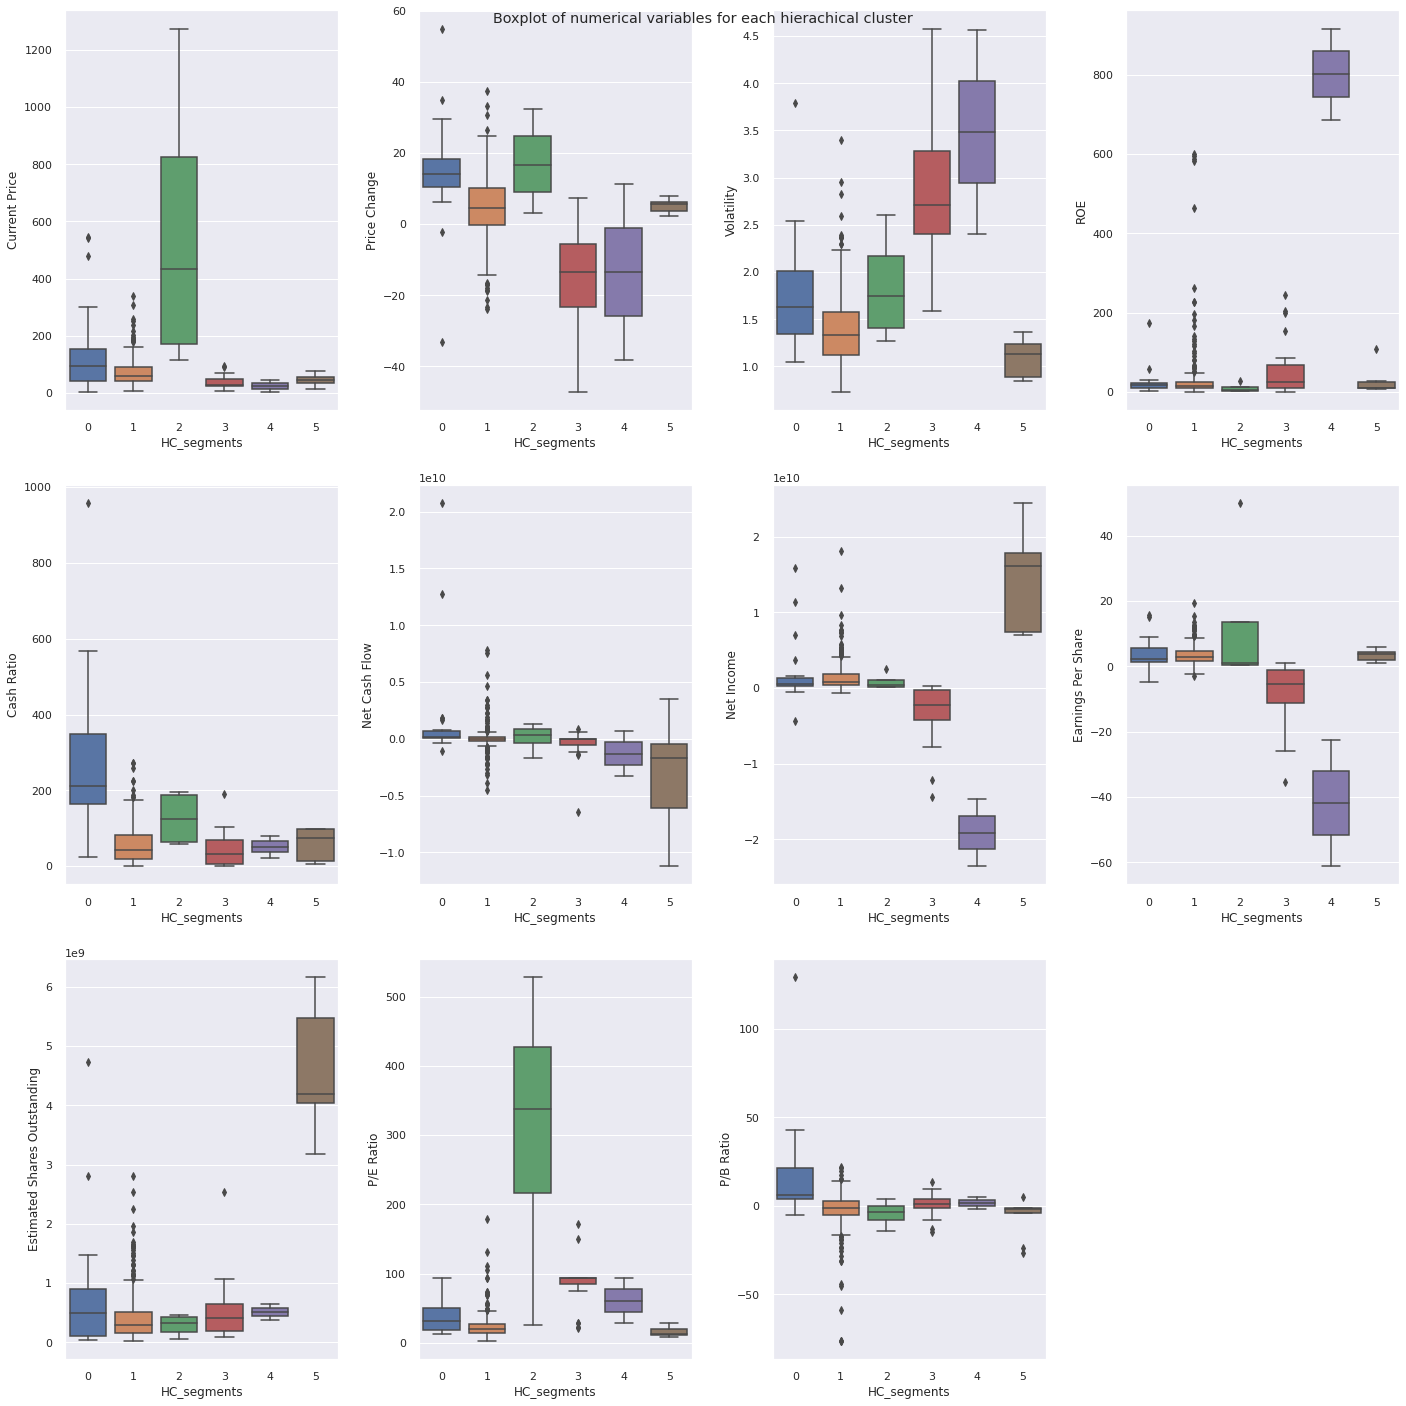

In [ ]:
# Visualise the behaviour of each attribute according to the respective hierachical clusters.
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each hierachical cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Insights from the Hierachical Clustering**

The dataset has been grouped into 6 clusters:

- **Cluster 2 - Best-yield Stocks**
   - This cluster consists of 4 companies.
   - They are able to meet their short-term cash obligations due to their high cash ratio.
   - The prices of these stocks are the highest but the prices are most likely to increase compared to other stocks. There is huge potential to profit form reselling.
   - The stock prices are moderately volatile.
   - These stocks have the highest earnings per share.


- **Cluster 0 - High-yield Stocks**
   - The high-yield cluster consists of 23 companies.
   - Their stock prices are moderate but they have one of the highest net incomes.
   - They also have the highest cash ratio and therefore able to meet their shot-term financial obligations.
   - They have high shareholding relative to all the other segments.
   - They also have high earnings per share.
   
   
- **Cluster 1 - Low-yield Stocks**
   - This cluster has up 280 companies.
   - Most of the companies fall into this cluster.
   - The stock prices are not very high and there is a slight likelihood of the prices increasing translating the resell profits.
   - These companies also have one of the lowest cash ratio.

- **Cluster 5 - Average-yield Stocks**
   - These cluster has 9 companies.
   - The stock prices are the least volatile but they have the highest net income and moderate earnings per share.
   - However their net cash flow is the lowest.
   - They also appear to have the highest shareholdings of all the clusters.
   - Their P/E ratio is also very low.

- **Cluster 3 - Poor-yield Stocks**
   - There are a total of 22 companies in the cluster.
   - They have negative net incomes and net cash flows.
   - They have the second highly most volatile stock prices after only the worst-yield stocks.
   - They have the second lowest earnings per share following worst-yield stocks.

- **Cluster 4 - Worst-yield Stocks**
   - There are just 2 companies in the cluster.
   - They have the lowest earnings per share and net incomes.
   - Their prices are most likely to drop revealing poor resell value.
   - They also have the highest price volatility and second highest shareholding.
   - They have the highest Return on Equity.





## K-means vs Hierarchical Clustering

- The **`K-means`** clustering took less time to execute: 0.048s, 0.044s and 0.046s for k-clusters = 4, 5 and 6 respectively. However the **`Hierachical`** clustering took more time for execution at approximately 56s.

- The **`K-means`** technique gave 4 distinct clusters while the  **`Hierachical`** technique gave 6 distinct clusters. However some clusters in the 2 techniques have grouped similar companies. For example, the average-yield stocks are quite similar for the 2 clustering techniques. **`K-means`** has 11 companies while **`Hierachical`** has 9 companies. The companies in these clusters are also similar.

- The low-yield stocks from both techniques have almost similar observations: **`K-means`** has 277 companies while **`Hierachical`** has 280 companies.

- The **`Hierachical`** algorithm was able to distinguish the best-yield stocks from high-yield stocks. The total observations in the best-yield and high-yield stocks is 27 companies while the **`K-means`** considers all into the same cluster (high-yield stocks) with total observations as 25 companies.

- The **`Hierachical`** algorithm was able to distinguish the poor-yield stocks from worst-yield stocks. The total observations in the poor-yield and worst-yield stocks is 24 companies while the **`K-means`** considers all into the same cluster (poor-yield stocks) with total observations as 27 companies.

## Actionable Insights and Recommendations

- **Cluster 2 - Best-yield Stocks:**
These are the highest gainers. These companies have the ability to meet their cash obligations. Investors are most likely to able to resell these stocks and make profits because of the increase in their stock price due to the high demand of these stocks. **The analysts should still appraise and advise investors considering that taxes are not equal across these dividends, hence, taxes are higher on some dividends thereby driving down dividends paid.**


- **Cluster 0 - High-yield Stocks:**
These stocks are similar to the best-yield stocks. However, they cost lesser than the best-yield stocks. Their high shareholding reflects the high demand for these stocks and, in turn, leading to likely profitable future value. **Investors who cannot pay a premium for the best-yield stocks may opt for high-yield stocks**

  
- **Cluster 1 - Low-yield Stocks:**
These are the companies that may not able to meet their cash obligations easily. Investing in these companies pose great risks to the investor. Although they might not have high earnings per price they are less volatile than most of the other stocks **There's a possibility of buying great number of shares with less money however the investor should be advised on the inherent risks.**
  

- **Cluster 5 - Average-yield Stocks:**
Their prices the least volatile and the companies in average stocks have the highest shareholdings. They also have the highest net income which is an attribute of a healthy business. **Therefore investors willing to play the long game may add these stocks to their portfolio but monitor them carefully.**

- **Cluster 3 and Cluster 4- Poor-yield Stocks and Worst-yield Stocks respectively:**
These companies do not have a clean bill of health owing to their low net incomes, net cash flows and cash ratios. They also possess low earnings per share. **The investor should be discouraged from buying these stocks.**

- The companies with high net income also had high earnings per share and high estimated outstanding shares (shareholders). **Therefore theses 3 metrics are important in determining the profitability of stocks.

- The stocks with highly volatile stock prices have low earnings per share.